# Informe de Análisis: Tiendas Alura Store

## Introducción

El propósito de este análisis es determinar cuál de las cuatro tiendas disponibles es la más adecuada para que el Sr. Juan venda sus productos. Para ello, se han considerado diversos factores clave, como los ingresos totales de las tiendas, las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes, los productos más y menos vendidos, y el coste promedio de envío. Este informe presenta un análisis detallado de cada uno de estos factores, respaldado por datos y visualizaciones, y concluye con una recomendación basada en los hallazgos.

El análisis se centrará en las siguientes métricas clave:
- **Facturación total por tienda**: Para identificar el desempeño financiero de cada tienda.
- **Ventas por categoría**: Para entender qué productos tienen mayor aceptación.
- **Calificación promedio de los clientes**: Para evaluar la satisfacción del cliente.
- **Productos más y menos vendidos**: Para identificar tendencias en el inventario.
- **Coste promedio de envío**: Para analizar la competitividad en costos logísticos.

Este informe presenta un análisis detallado de cada métrica, respaldado por datos y visualizaciones, y concluye con una recomendación basada en los hallazgos.

### Importación de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


**Estructura de datos**

El conjunto de datos incluye la siguiente información:

**Producto y Categoría**: Artículos vendidos y sus calificaciones.

**Precio y Envío**: Valores de venta y costos asociados.

**Fecha y ubicación de compra**: Información temporal y geográfica.

**Evaluación de compra**: Comentarios de clientes.

**Tipo de Pago y Cuotas**: Métodos utilizados por los clientes.

**Coordenadas Geográficas**: Ubicación de las transacciones.

In [5]:
# Agregar columna con el nombre de la tienda
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenar los datos de todas las tiendas
tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4])

tiendas.sample(10)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
1543,Mesa de noche,Muebles,237000.0,17300.0,01/08/2020,Maria Alfonso,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 3
830,Cama king,Muebles,400400.0,21700.0,29/01/2020,Santiago Silva,Bogotá,4,Nequi,1,4.60971,-74.08175,Tienda 3
1503,Set de ollas,Artículos para el hogar,117600.0,11000.0,09/11/2020,Pedro Gomez,Medellín,5,Tarjeta de crédito,8,6.25184,-75.56359,Tienda 2
1054,Impresora,Electrónicos,259600.0,12000.0,03/11/2020,Santiago Silva,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 1
1802,Modelado predictivo,Libros,69800.0,4100.0,30/03/2022,Juliana Costa,Medellín,4,Tarjeta de crédito,2,6.25184,-75.56359,Tienda 2
1082,Ciencia de datos con Python,Libros,48000.0,0.0,22/06/2021,Juan Fernandez,Medellín,4,Tarjeta de crédito,6,6.25184,-75.56359,Tienda 2
51,Estufa,Electrodomésticos,1024300.0,54800.0,03/01/2020,Juliana Costa,Bogotá,4,Nequi,1,4.60971,-74.08175,Tienda 3
66,Ciencia de datos con Python,Libros,47600.0,4900.0,06/01/2021,Juliana Costa,Bogotá,4,Nequi,1,4.60971,-74.08175,Tienda 3
708,Set de vasos,Artículos para el hogar,38900.0,0.0,14/12/2022,Mariana Herrera,Medellín,4,Tarjeta de crédito,6,6.25184,-75.56359,Tienda 3
65,Iphone 15,Electrónicos,2525400.0,135000.0,03/03/2023,Maria Alfonso,Medellín,4,Tarjeta de crédito,1,6.25184,-75.56359,Tienda 1


## Desarrollo

# 1. Análisis de facturación

In [77]:
# Facturación total por tienda
facturacion_por_tienda = tiendas.groupby('Tienda')['Precio'].sum()
facturacion_por_tienda = facturacion_por_tienda.apply(lambda x: f"${x:,.2f}")
print(facturacion_por_tienda)

Tienda
Tienda 1    $1,150,880,400.00
Tienda 2    $1,116,343,500.00
Tienda 3    $1,098,019,600.00
Tienda 4    $1,038,375,700.00
Name: Precio, dtype: object


In [78]:
# Mostrar los 5 lugares con mayor facturación
top_facturacion = tiendas.groupby('Lugar de Compra')['Precio'].sum().sort_values(ascending=False).head(5)
top_facturacion = top_facturacion.apply(lambda x: f"${x:,.2f}")
print("Top 5 lugares con mayor facturación:")
print(top_facturacion)

Top 5 lugares con mayor facturación:
Lugar de Compra
Bogotá          $1,814,858,300.00
Medellín        $1,096,669,200.00
Cali              $506,526,100.00
Pereira           $225,927,300.00
Barranquilla      $132,040,500.00
Name: Precio, dtype: object


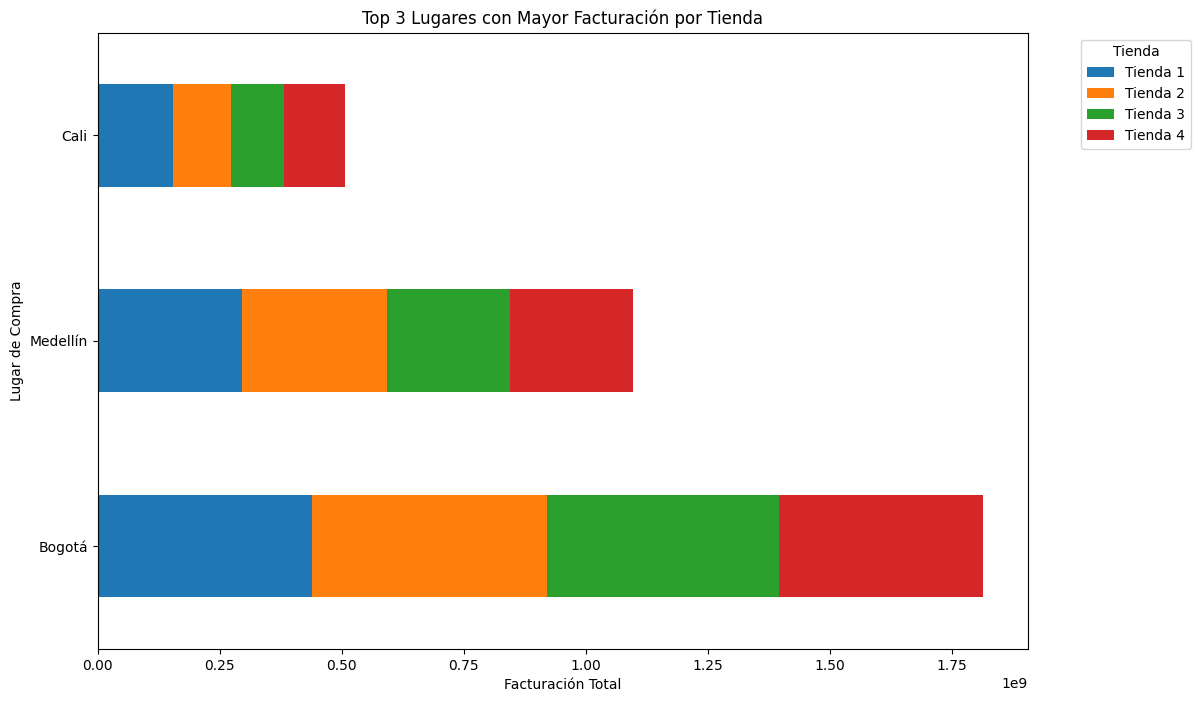

In [96]:
import matplotlib.pyplot as plt

# Obtener el top 3 de lugares con mayor facturación
facturacion_por_lugar_y_tienda = tiendas.pivot_table(
    index='Lugar de Compra',
    columns='Tienda',
    values='Precio',
    aggfunc='sum',
    fill_value=0
)

top_3_facturacion_por_lugar_y_tienda = facturacion_por_lugar_y_tienda.sum(axis=1).nlargest(3).index
facturacion_top_3 = facturacion_por_lugar_y_tienda.loc[top_3_facturacion_por_lugar_y_tienda]

# Graficar el top 3 de facturación por lugar de compra y tienda
facturacion_top_3.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    title='Top 3 Lugares con Mayor Facturación por Tienda',
    xlabel='Facturación Total',
    ylabel='Lugar de Compra'
)

plt.legend(title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [6]:
import folium
from folium.plugins import HeatMap

# Crear un mapa base centrado en las coordenadas promedio
mapa = folium.Map(
    location=[tiendas['lat'].mean(), tiendas['lon'].mean()],
    zoom_start=6
)

# Preparar los datos para el Heatmap
datos_heatmap = tiendas[['lat', 'lon', 'Precio']].dropna()

# Agregar el Heatmap al mapa
HeatMap(
    data=datos_heatmap.values,
    radius=10,
    blur=15,
    max_zoom=1
).add_to(mapa)

# Mostrar el mapa
mapa

### Ingresos Totales por Tienda
Los ingresos totales de las tiendas son los siguientes:
- **Tienda 1**: $1,150,880,400.00
- **Tienda 2**: $1,116,343,500.00
- **Tienda 3**: $1,098,019,600.00
- **Tienda 4**: $1,038,375,700.00

La Tienda 1 lidera en ingresos totales, lo que indica un alto volumen de ventas y una base de clientes sólida.

# 2. Ventas por categoría

In [ ]:
# Calcular las ventas por categoría
ventas_por_categoria = tiendas.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=True)

ventas_por_categoria_ordenadas = ventas_por_categoria.sort_values(ascending=False)

# Categorías más vendidas
categorias_mas_vendidas = ventas_por_categoria_ordenadas.head(2)
print("Categorías más vendidas:")
print(categorias_mas_vendidas.apply(lambda x: f"${x:,.2f}"))

# Categorías menos vendidas
categorias_menos_vendidas = ventas_por_categoria_ordenadas.tail(2)
print("\nCategorías menos vendidas:")
print(categorias_menos_vendidas.apply(lambda x: f"${x:,.2f}"))

Categorías más vendidas:
Categoría del Producto
Electrónicos         $1,660,576,500.00
Electrodomésticos    $1,324,751,100.00
Name: Precio, dtype: object

Categorías menos vendidas:
Categoría del Producto
Artículos para el hogar    $57,579,800.00
Libros                     $37,696,100.00
Name: Precio, dtype: object


<Axes: title={'center': 'Ventas por Categoría'}, xlabel='Ventas Totales', ylabel='Categoría'>

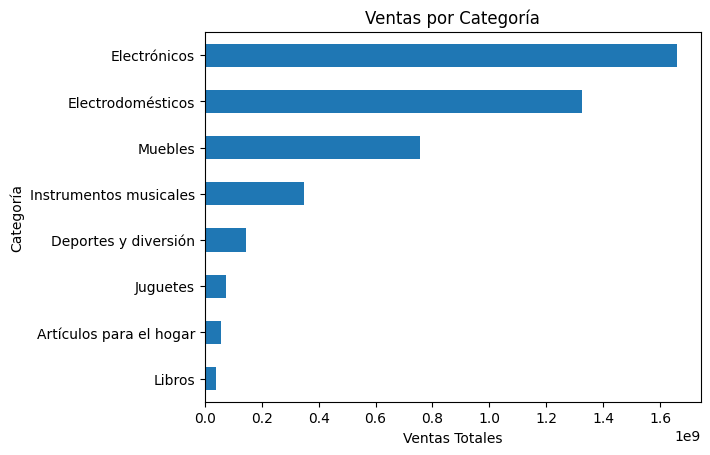

In [22]:
# Calcular las ventas por categoría
ventas_por_categoria = tiendas.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=True)

# Visualizar las ventas por categoría
ventas_por_categoria.plot(
    kind='barh', 
    title='Ventas por Categoría', 
    xlabel='Ventas Totales', 
    ylabel='Categoría'
)

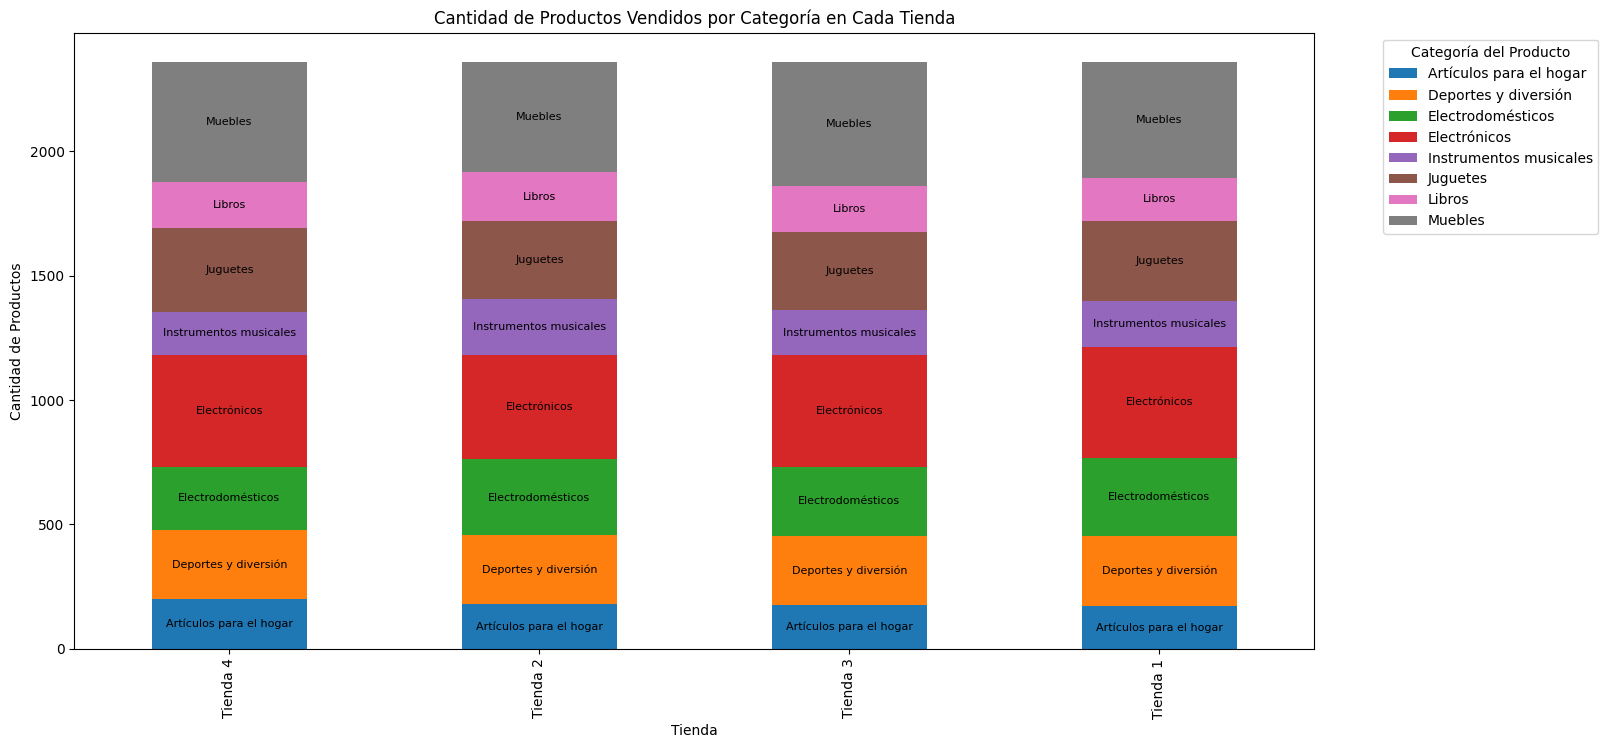

In [86]:
import matplotlib.pyplot as plt

# Calcular la cantidad de productos vendidos por categoría en cada tienda
productos_por_categoria_tienda = tiendas.groupby(['Tienda', 'Categoría del Producto']).size().unstack(fill_value=0)

ax = productos_por_categoria_tienda.sort_values(by=productos_por_categoria_tienda.columns.tolist(), ascending=False).plot(
    kind='bar', 
    stacked=True, 
    figsize=(16, 8), 
    title='Cantidad de Productos Vendidos por Categoría en Cada Tienda', 
    xlabel='Tienda', 
    ylabel='Cantidad de Productos'
)

for container, column in zip(ax.containers, productos_por_categoria_tienda.columns):
    ax.bar_label(container, labels=[column] * len(container), label_type='center', fontsize=8)
    ax.legend(title='Categoría del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Categorías de Productos Más y Menos Vendidas
Las categorías más vendidas son:
- **Electrónicos**: $1,660,576,000.00
- **Electrodomésticos**: $1,324,751,000.00

Las categorías menos vendidas son:
- **Libros**: $37,696,100.00
- **Artículos para el hogar**: $57,579,800.00

Esto sugiere que los productos tecnológicos tienen mayor aceptación en todas las tiendas. Por otro lado, las categorías menos vendidas podrían representar una oportunidad para optimizar el inventario o redirigir esfuerzos hacia productos más rentables.

# 3. Calificación promedio de la tienda


In [ ]:
# Calcular la calificación promedio por tienda
calificacion_promedio_tienda = tiendas.groupby('Tienda')['Calificación'].mean().sort_values(ascending=False)

# Formatear las calificaciones promedio con dos decimales
calificacion_promedio_tienda= calificacion_promedio_tienda.apply(lambda x: f"{x:.2f}")
print("Calificación promedio por tienda:")
print(calificacion_promedio_tienda)

Calificación promedio por tienda:
Tienda
Tienda 3    4.05
Tienda 2    4.04
Tienda 4    4.00
Tienda 1    3.98
Name: Calificación, dtype: object


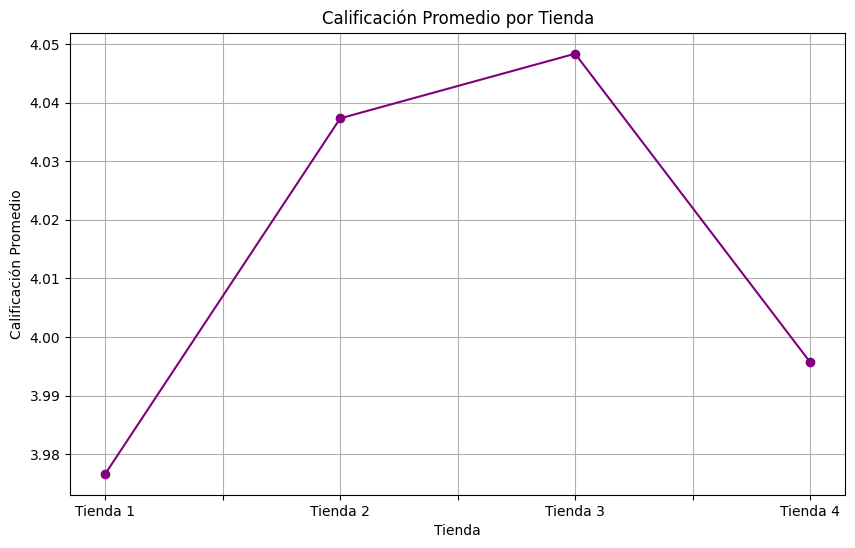

In [ ]:
# Calificación promedio por tienda
calificacion_promedio_tienda_numeric = tiendas.groupby('Tienda')['Calificación'].mean()
calificacion_promedio_tienda_numeric.plot(
    kind='line',
    marker='o',
    title='Calificación Promedio por Tienda',
    xlabel='Tienda',
    ylabel='Calificación Promedio',
    figsize=(10, 6),
    color='purple'
)
plt.grid()
plt.show()

### Calificaciones Promedio de los Clientes
Las calificaciones promedio por tienda son:
- **Tienda 3**: 4.05
- **Tienda 2**: 4.04
- **Tienda 4**: 4.00
- **Tienda 1**: 3.98

La Tienda 3 tiene la mejor calificación promedio, lo que refleja una alta satisfacción de los clientes. Esto podría estar relacionado con una mejor experiencia de compra, productos de mayor calidad o un servicio al cliente más eficiente.

# 4. Productos más y menos vendidos

In [50]:
# Calcular las ventas totales por producto en cada tienda
ventas_por_producto_tienda = tiendas.groupby(['Tienda', 'Producto'])['Precio'].sum()

# Identificar los productos más vendidos y menos vendidos en cada tienda
productos_destacados = ventas_por_producto_tienda.groupby('Tienda').agg(['idxmax', 'max', 'idxmin', 'min'])
productos_destacados.columns = ['Producto Más Vendido', 'Ventas Más Altas', 'Producto Menos Vendido', 'Ventas Más Bajas']

# Formatear los montos como dinero
productos_destacados['Ventas Más Altas'] = productos_destacados['Ventas Más Altas'].apply(lambda x: f"${x:,.2f}")
productos_destacados['Ventas Más Bajas'] = productos_destacados['Ventas Más Bajas'].apply(lambda x: f"${x:,.2f}")

print("Productos más y menos vendidos en cada tienda:")
print(productos_destacados)

Productos más y menos vendidos en cada tienda:
               Producto Más Vendido Ventas Más Altas  \
Tienda                                                 
Tienda 1  (Tienda 1, TV LED UHD 4K)  $142,150,200.00   
Tienda 2      (Tienda 2, Iphone 15)  $113,225,800.00   
Tienda 3   (Tienda 3, Refrigerador)   $99,889,700.00   
Tienda 4      (Tienda 4, Iphone 15)   $96,697,500.00   

                  Producto Menos Vendido Ventas Más Bajas  
Tienda                                                     
Tienda 1  (Tienda 1, Cuerda para saltar)      $652,800.00  
Tienda 2     (Tienda 2, Cubo mágico 8x8)      $643,600.00  
Tienda 3     (Tienda 3, Cubo mágico 8x8)      $640,400.00  
Tienda 4  (Tienda 4, Cuerda para saltar)      $704,800.00  


### Productos Más y Menos Vendidos
Los productos más vendidos son:
- **Tienda 1**: TV LED UHD 4K ($142,150,200.00)
- **Tienda 2**: Iphone 15 ($113,225,800.00)
- **Tienda 3**: Refrigerador ($99,889,700.00)
- **Tienda 4**: Iphone 15 ($96,697,500.00)

Los productos menos vendidos son:
- **Tienda 1**: Cuerda para saltar ($652,800.00)
- **Tienda 2**: Cubo mágico 8x8 ($643,600.00)
- **Tienda 3**: Cubo mágico 8x8 ($640,400.00)
- **Tienda 4**: Cuerda para saltar ($704,800.00)

Esto indica que los productos de alto valor tienen un buen desempeño en todas las tiendas, mientras que los productos menos vendidos podrían ser descontinuados o promocionados para mejorar su desempeño.

# 5. Envío promedio por tienda

In [43]:
# Calcular el costo promedio de envío por tienda
envio_promedio_por_tienda = tiendas.groupby('Tienda')['Costo de envío'].mean()

# Formatear los montos como dinero
envio_promedio_por_tienda_formateado = envio_promedio_por_tienda.apply(lambda x: f"${x:,.2f}")

# Mostrar los resultados
print("Costo promedio de envío por tienda:")
print(envio_promedio_por_tienda_formateado)

Costo promedio de envío por tienda:
Tienda
Tienda 1    $26,018.61
Tienda 2    $25,216.24
Tienda 3    $24,805.68
Tienda 4    $23,459.46
Name: Costo de envío, dtype: object


### Coste Promedio de Envío
El coste promedio de envío por tienda es:
- **Tienda 1**: $26,018.61
- **Tienda 2**: $25,216.24
- **Tienda 3**: $24,805.68
- **Tienda 4**: $23,459.46

La Tienda 4 tiene el coste de envío más bajo, lo que puede ser atractivo para los clientes.

# Graficos

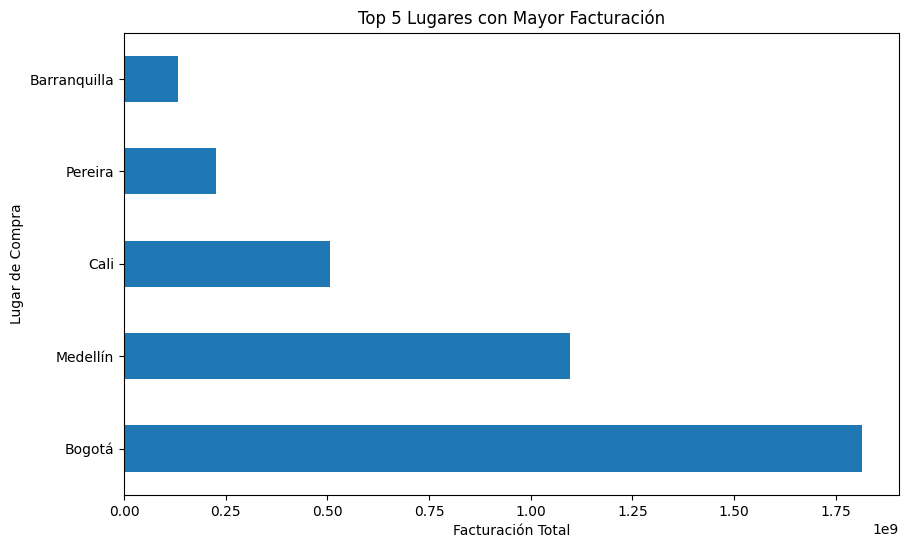

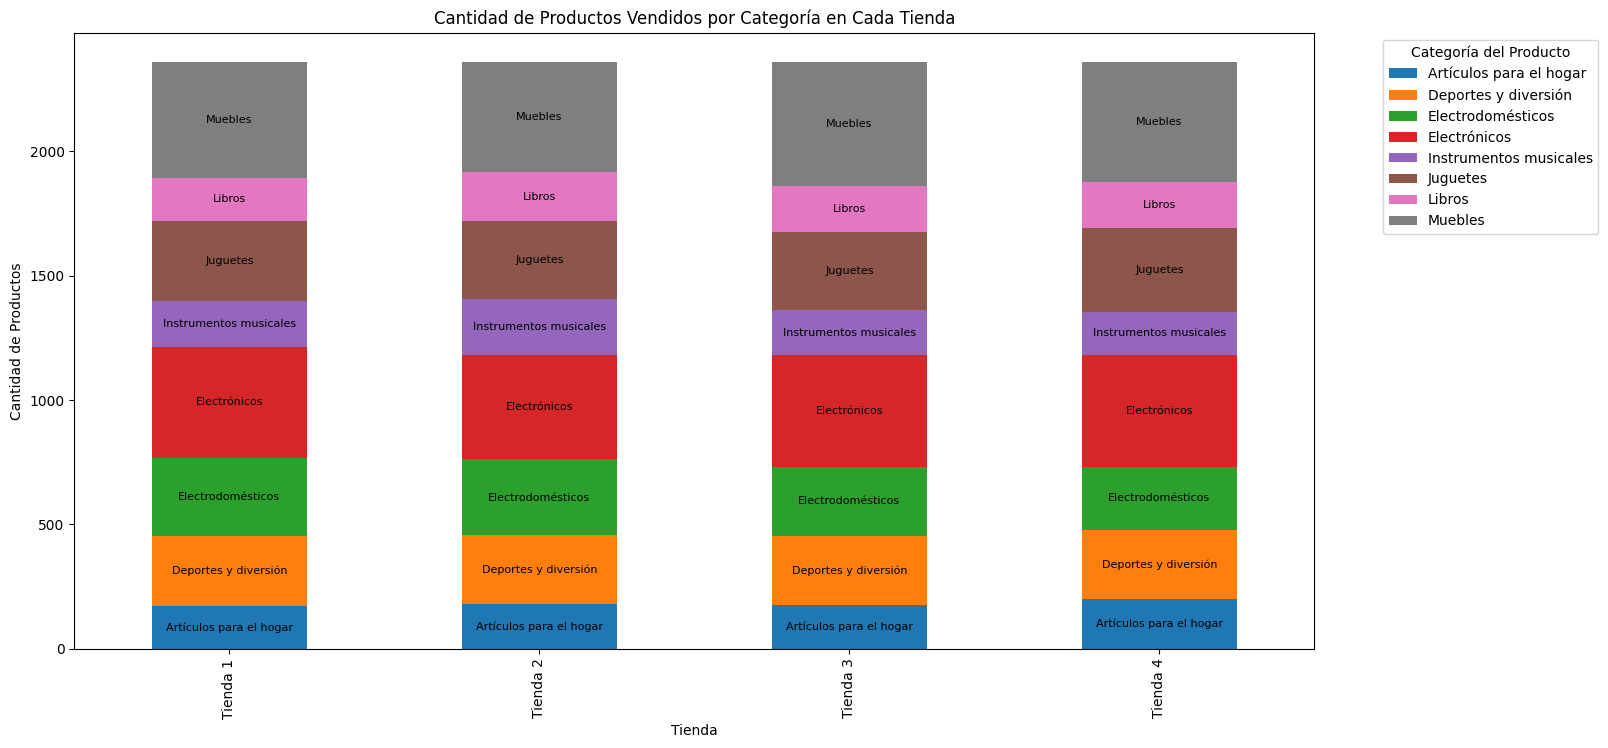

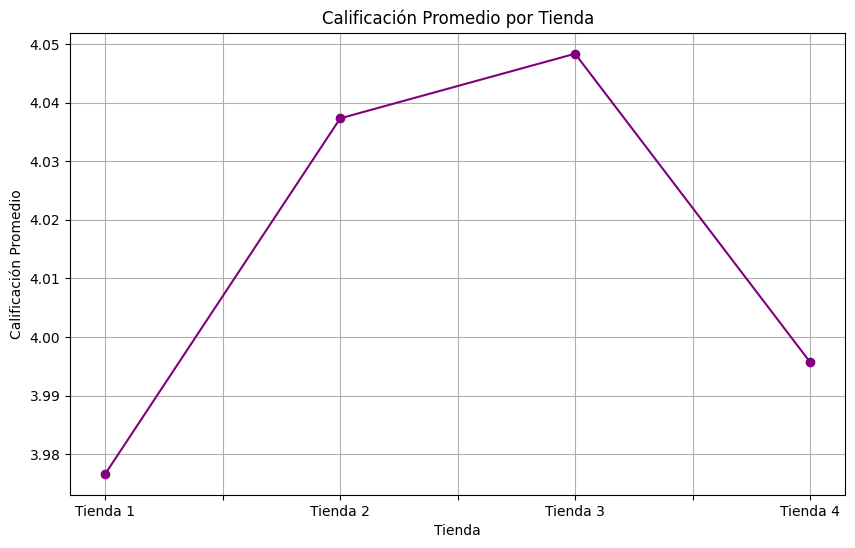

In [73]:
import matplotlib.pyplot as plt

# Gráfico 1: Top 5 lugares con mayor facturación
tiendas.groupby('Lugar de Compra')['Precio'].sum().sort_values(ascending=False).head(5).plot(
    kind='barh', 
    title='Top 5 Lugares con Mayor Facturación', 
    xlabel='Facturación Total', 
    ylabel='Lugar de Compra',
    figsize=(10, 6)
)
plt.show()

# Gráfico 2: Ventas por categoría
ax = productos_por_categoria_tienda.plot(
    kind='bar', 
    stacked=True, 
    figsize=(16, 8), 
    title='Cantidad de Productos Vendidos por Categoría en Cada Tienda', 
    xlabel='Tienda', 
    ylabel='Cantidad de Productos'
)
for container, column in zip(ax.containers, productos_por_categoria_tienda.columns):
    ax.bar_label(container, labels=[column] * len(container), label_type='center', fontsize=8)
    ax.legend(title='Categoría del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Gráfico 3: Calificación promedio por tienda
calificacion_promedio_tienda_numeric = tiendas.groupby('Tienda')['Calificación'].mean()
calificacion_promedio_tienda_numeric.plot(
    kind='line',
    marker='o',
    title='Calificación Promedio por Tienda',
    xlabel='Tienda',
    ylabel='Calificación Promedio',
    figsize=(10, 6),
    color='purple'
)
plt.grid()
plt.show()

# Conclusión

Tras analizar los factores mencionados, se recomienda que el Sr. Juan venda sus productos en la **Tienda 3**. Esta tienda destaca por tener la mejor calificación promedio de los clientes (4.05), lo que refleja una alta satisfacción y confianza. Además, aunque no lidera en ingresos totales, se encuentra cerca de las primeras posiciones, lo que indica un buen desempeño en ventas. Por último, el coste de envío en la Tienda 3 es competitivo, lo que puede beneficiar tanto al Sr. Juan como a sus clientes.

Por otro lado, aunque la Tienda 1 lidera en ingresos, su calificación promedio más baja (3.98) y su coste de envío más alto ($26,018.61) la hacen menos atractiva. La Tienda 4, aunque tiene el coste de envío más bajo, no compensa con ingresos ni calificaciones destacadas.

La Tienda 3 combina una alta satisfacción del cliente, un buen volumen de ventas y un coste de envío razonable, lo que la convierte en la opción más equilibrada y estratégica para el Sr. Juan.